After the other notebooks in this repo have been run, this notebook can replicate figure 1 in the paper using the DataFrames `*.frob` generated.

In [16]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [17]:
BN_df = pd.read_pickle('batchnorm_ntk.frob')
trsfmr_df = pd.read_pickle('transformer_ntk.frob')
rnn_df = pd.read_pickle('rnn_ap_ntk.frob')
birnn_df = pd.read_pickle('birnn_ap_ntk.frob')

In [18]:
BN_df['model'] = 'BN+ReLU'

trsfmr_df['model'] = 'transformer'

rnn_df['model'] = 'RNN'

birnn_df['model'] = 'BiRNN'

In [19]:
frob_df = pd.concat([BN_df, trsfmr_df, rnn_df, birnn_df])

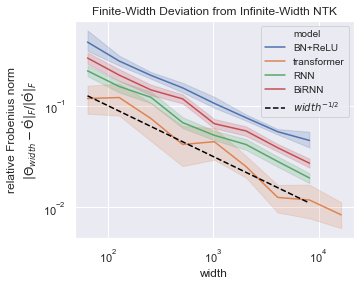

In [20]:
plt.figure(figsize=(5, 4))
plt.title('Finite-Width Deviation from Infinite-Width NTK')
sns.lineplot(x='width', y='relfrob', hue='model', data=frob_df)
plt.plot(2**np.linspace(6, 13), 2**(-np.linspace(6, 13)/2), '--', c='black', label=r'$width^{-1/2}$')
plt.legend(loc='upper right', fontsize=10)
plt.loglog()
plt.ylabel('relative Frobenius norm\n'
           r'$\|\Theta_{width} - \mathring{\Theta}\|_F / \|\mathring{\Theta}\|_F$')
plt.xlabel(r'width')
plt.savefig('NTKdeviation.pdf', bbox_inches='tight')
plt.savefig('NTKdeviation.png', bbox_inches='tight')